In [85]:
import numpy as np
from sklearn.datasets import make_classification, make_blobs
import matplotlib.pyplot as plt

In [86]:
X, y = make_blobs(n_samples=200, centers=4, cluster_std=3, random_state=42)

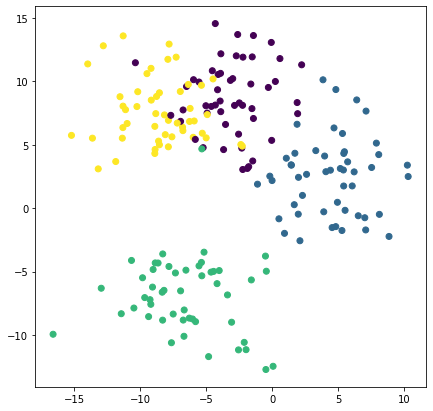

In [87]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y);

In [88]:
from sklearn.metrics.pairwise import euclidean_distances

class KMeans:        
    def train(self, X, k, init='random', track_history=False):
        self.iters_count = 0
        self.centroids = X[np.random.choice(len(X), k)]
            
        if track_history:
            self.history = {'centroids': [self.centroids], 'clusters': []}
        has_converged = False
        
        while not has_converged:
            clusters_assignment = self.assign_clusters(X)
            new_centroids = self.move_centroids(X, k, clusters_assignment)
            has_converged = np.linalg.norm(new_centroids - self.centroids) < 1e-5
            self.centroids = new_centroids
            
            if track_history:
                self.history['centroids'].append(self.centroids)
                self.history['clusters'].append(clusters_assignment)
            self.iters_count += 1
            if self.iters_count > 100:
                break
        if track_history:
            print(f'{self.iters_count} iteration')
        
    def evaluate(self, X):
        cluster_assignment = self.assign_clusters(X)
        numerator = 0
        denominator = 0
        for k in range(len(self.centroids)):
            cluster = X[cluster_assignment == k]
            if len(cluster) < 2:
                continue
            numerator += np.sum(euclidean_distances(cluster)) / 2
            denominator += (len(cluster) * (len(cluster) - 1)) / 2

        return numerator / denominator
    
    def assign_clusters(self, X):
        return np.array([
            np.argmin(np.linalg.norm(x - self.centroids, axis=1)) for x in X
        ])
    
    def move_centroids(self, X, k, clusters_assignment):
        new_centroids = np.zeros_like(self.centroids)
        
        for i in range(k):
            cluster = X[clusters_assignment == i]
            if not len(cluster):
                continue
            new_centroids[i] = np.mean(cluster, axis=0)

        return new_centroids

<H4>Підбір кількості кластерів</H4>

4 iteration
5 iteration
9 iteration
12 iteration
15 iteration


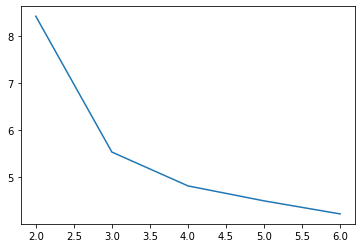

In [89]:
kmeans = KMeans()
scores = []
for k in range(2, 7):
    kmeans.train(X, k, track_history=True)
    scores.append(kmeans.evaluate(X))
plt.plot(range(2, 7), scores);

In [90]:
kmeans = KMeans()
cluster_number = 4
kmeans.train(X, cluster_number, track_history=True)

11 iteration


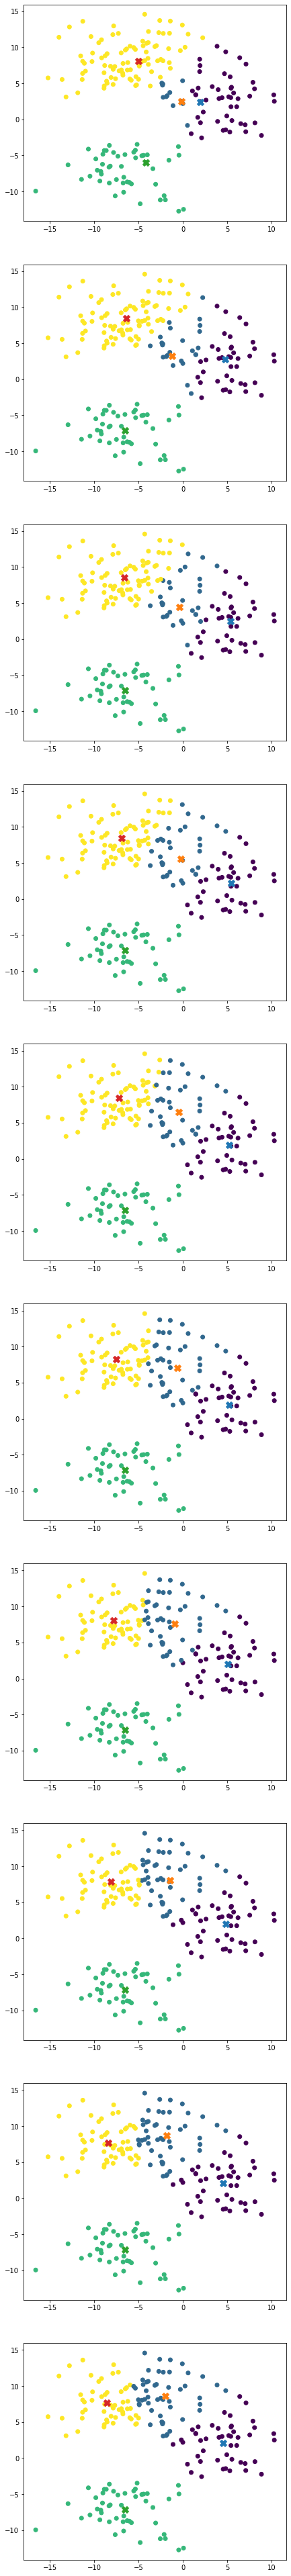

In [91]:
fig, axs = plt.subplots(kmeans.iters_count - 1)
fig.set_figheight(7 * (kmeans.iters_count - 1))
fig.set_figwidth(7)

for i in range(kmeans.iters_count - 1):
    axs[i].scatter(X[:, 0], X[:, 1], c=kmeans.history['clusters'][i])
    for k in range(cluster_number):
        axs[i].scatter([kmeans.history['centroids'][i][k][0]],
                       [kmeans.history['centroids'][i][k][1]],
                       s=100,
                       marker='X')